## Data Description

**Attributes Information**

| **Attribute** | **Data Type** | **Description** |
| --- | --- | --- |
| CustomerID | Integer | Customer ID |
| Churn | Integer | 1 means customer leave and 0 means customer uses the service |
| Tenure | Float | Tenure of customer in organization |
| PreferredLoginDevice | Object | Preferred login device of customer like laptop or phone |
| CityTier | Integer | City tier(1,2,3) |
| WarehouseToHome | Float | Distance in between warehouse to home of customer |
| PreferredPaymentMode | Object | Preferred payment method of customer |
| Gender | Object | Gender of customer |
| HourSpendOnApp | Float | Number of hours spend on mobile application or website |
| NumberOfDeviceRegistered | Integer | Total number of deceives is registered on particular customer |
| PreferedOrderCat | Object | Preferred order category of customer in last month |
| SatisfactionScore | Integer | Satisfactory score of customer on service |
| MaritalStatus | Object | Marital status of customer |
| NumberOfAddress | Integer | Total number of added added on particular customer |
| Complain | Integer | Any complaint has been raised in last month |
| OrderAmountHikeFromlastYear | Float | Percentage increases in order from last year |
| CouponUsed | Float | Total number of coupon has been used in last month |
| OrderCount | Float | Total number of orders has been places in last month |
| DaySinceLastOrder | Float | Day Since last order by customer |
| CashbackAmount | Float | Average cashback in last month |

<br>


In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.ticker as mtick
import plotly.graph_objs as go
import plotly.express as ex
import plotly.figure_factory as ff
from plotly.subplots import make_subplots
import seaborn as sns
from scipy.stats import chi2
from scipy.stats import skew


import sklearn.impute
from sklearn import impute
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:,.2f}'.format

In [4]:
#description = pd.read_excel('/content/drive/MyDrive/E Commerce Dataset.xlsx', sheet_name='Data Dict', header=1, usecols=[1,2,3])
data = pd.read_excel('C:/Users/user/NOTEBOOKS/Churn Analysis using Customer Segmentation/E Commerce Dataset.xlsx', sheet_name='E Comm')
data.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.00,Mobile Phone,3,6.00,Debit Card,Female,3.00,3,Laptop & Accessory,2,Single,9,1,11.00,1.00,1.00,5.00,159.93
1,50002,1,NaN,Phone,1,8.00,UPI,Male,3.00,4,Mobile,3,Single,7,1,15.00,0.00,1.00,0.00,120.90
2,50003,1,NaN,Phone,1,30.00,Debit Card,Male,2.00,4,Mobile,3,Single,6,1,14.00,0.00,1.00,3.00,120.28
3,50004,1,0.00,Phone,3,15.00,Debit Card,Male,2.00,4,Laptop & Accessory,5,Single,8,0,23.00,0.00,1.00,3.00,134.07
4,50005,1,0.00,Phone,1,12.00,CC,Male,NaN,3,Mobile,5,Single,3,0,11.00,1.00,1.00,3.00,129.60


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

## Data Exploration & Cleaning

### Handling Duplicate Value

Merging features that have same meaning but are written differently

In [22]:
data['PreferredLoginDevice'].value_counts()

Mobile Phone    3996
Computer        1634
Name: PreferredLoginDevice, dtype: int64

In the 'PreferredLoginDevice' column, which means what type of device the customer uses to access the company's online ecommerce, there is a similarity in meaning between 'Mobile Phone' and 'Phone', where these can be combined / equalized in value to become 'Mobile Phone'.

In [12]:
data.loc[data['PreferredLoginDevice'] == 'Phone', 'PreferredLoginDevice' ] = 'Mobile Phone'

In [13]:
data['PreferredLoginDevice'].value_counts()

Mobile Phone    3996
Computer        1634
Name: PreferredLoginDevice, dtype: int64

In [14]:
data['PreferredPaymentMode'].value_counts()

Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

In the 'PreferredPaymentMode' column, which means what payment method the customer uses in transactions on the company's online ecommerce, there is a similarity in meaning between 'Credit Card' and 'CC' where these can be combined / equalized in value to become 'Credit Card', then 'Cash on Delivery' with 'COD' can be combined in value to become 'Cash on Delivery'.

In [15]:
data.loc[data['PreferredPaymentMode'] == 'COD', 'PreferredPaymentMode' ] = 'Cash on Delivery'  
data.loc[data['PreferredPaymentMode'] == 'CC', 'PreferredPaymentMode' ] = 'Credit Card'

In [16]:
data['PreferredPaymentMode'].value_counts()

Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: PreferredPaymentMode, dtype: int64

In [17]:
data['PreferedOrderCat'].value_counts()

Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

In the 'PreferredOrderCat' column, which means the type of product that is most frequently purchased by customers in the company's online ecommerce, there is a similarity in meaning between 'Mobile Phone' and 'Mobile', where these can be combined / equalized in value to become 'Mobile Phone'.

In [18]:
data.loc[data['PreferedOrderCat'] == 'Mobile', 'PreferedOrderCat' ] = 'Mobile Phone'

In [19]:
data['PreferedOrderCat'].value_counts()

Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

In [20]:
data['MaritalStatus'].value_counts()

Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64

In [21]:
data['Gender'].value_counts()

Male      3384
Female    2246
Name: Gender, dtype: int64

## Exploratory Data Analysis (EDA)

### Descriptive Statistics

In [23]:
# split numerical and categorical columns
numerical = ['CustomerID', 'Tenure', 'CityTier', 'WarehouseToHome','HourSpendOnApp','NumberOfDeviceRegistered','SatisfactionScore',
             'NumberOfAddress','Complain','OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder','CashbackAmount']
categorical = ['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus']
target = 'Churn'

In [27]:
data[numerical].describe().round(2) # type: ignore

,CustomerID,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
count,"5,630.00","5,366.00","5,630.00","5,379.00","5,375.00","5,630.00","5,630.00","5,630.00","5,630.00","5,365.00","5,374.00","5,372.00","5,323.00","5,630.00"
mean,"52,815.50",10.19,1.65,15.64,2.93,3.69,3.07,4.21,0.28,15.71,1.75,3.01,4.54,177.22
std,"1,625.39",8.56,0.92,8.53,0.72,1.02,1.38,2.58,0.45,3.68,1.89,2.94,3.65,49.21
min,"50,001.00",0.00,1.00,5.00,0.00,1.00,1.00,1.00,0.00,11.00,0.00,1.00,0.00,0.00
25%,"51,408.25",2.00,1.00,9.00,2.00,3.00,2.00,2.00,0.00,13.00,1.00,1.00,2.00,145.77
50%,"52,815.50",9.00,1.00,14.00,3.00,4.00,3.00,3.00,0.00,15.00,1.00,2.00,3.00,163.28
75%,"54,222.75",16.00,3.00,20.00,3.00,4.00,4.00,6.00,1.00,18.00,2.00,3.00,7.00,196.39
max,"55,630.00",61.00,3.00,127.00,5.00,6.00,5.00,22.00,1.00,26.00,16.00,16.00,46.00,324.99


In [28]:
desc_cats = data[categorical].describe().T # type: ignore
desc_cats['frac'] = 100 * desc_cats['freq'] / desc_cats['count']
desc_cats

,count,unique,top,freq,frac
PreferredLoginDevice,5630,2,Mobile Phone,3996,70.98
PreferredPaymentMode,5630,5,Debit Card,2314,41.10
Gender,5630,2,Male,3384,60.11
PreferedOrderCat,5630,5,Mobile Phone,2080,36.94
MaritalStatus,5630,3,Married,2986,53.04


In [79]:
# ## Measures of Dispersion
# range_value = df['column_name'].max() - df['column_name'].min()
# variance_value = df['column_name'].var()
# std_dev_value = df['column_name'].std()
# Q1 = df['column_name'].quantile(0.25)
# Q3 = df['column_name'].quantile(0.75)
# IQR = Q3 - Q1


In [78]:
# # Measures of Distribution Shape
# from scipy.stats import skew
# skewness_value = skew(df['column_name'].dropna())
# kurtosis_value = kurtosis(df['column_name'].dropna())



In [77]:
# # Summary Statistics for Categorical Data
# frequency_counts = df['categorical_column'].value_counts()
# proportions = df['categorical_column'].value_counts(normalize=True) * 100

# # Summary Statistics for Continuous Data
# percentiles = df['column_name'].quantile([0.25, 0.5, 0.75])
# cumulative_freq = df['column_name'].value_counts().sort_index().cumsum()


In [76]:
# # Cross-Tabulations and Contingency Tables
# cross_tab = pd.crosstab(df['column1'], df['column2'])
# # Chi-Square Test for Independence

# chi2, p, dof, expected = chi2(cross_tab)


In [9]:
data_churn = data[data['Churn']==1].copy()
data_churn.drop(['Churn','CustomerID'], axis=1, inplace= True)

In [34]:
fig = ex.pie(data,names='Churn')
fig.update_layout(title='<b>Proportion Of Churn Samples<b>')
fig.show()

16.8% Customer churn and 83.2% customer did not churn, in other words the company lost revenue of 16.8% from customer churn. 

### Data Visualization

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

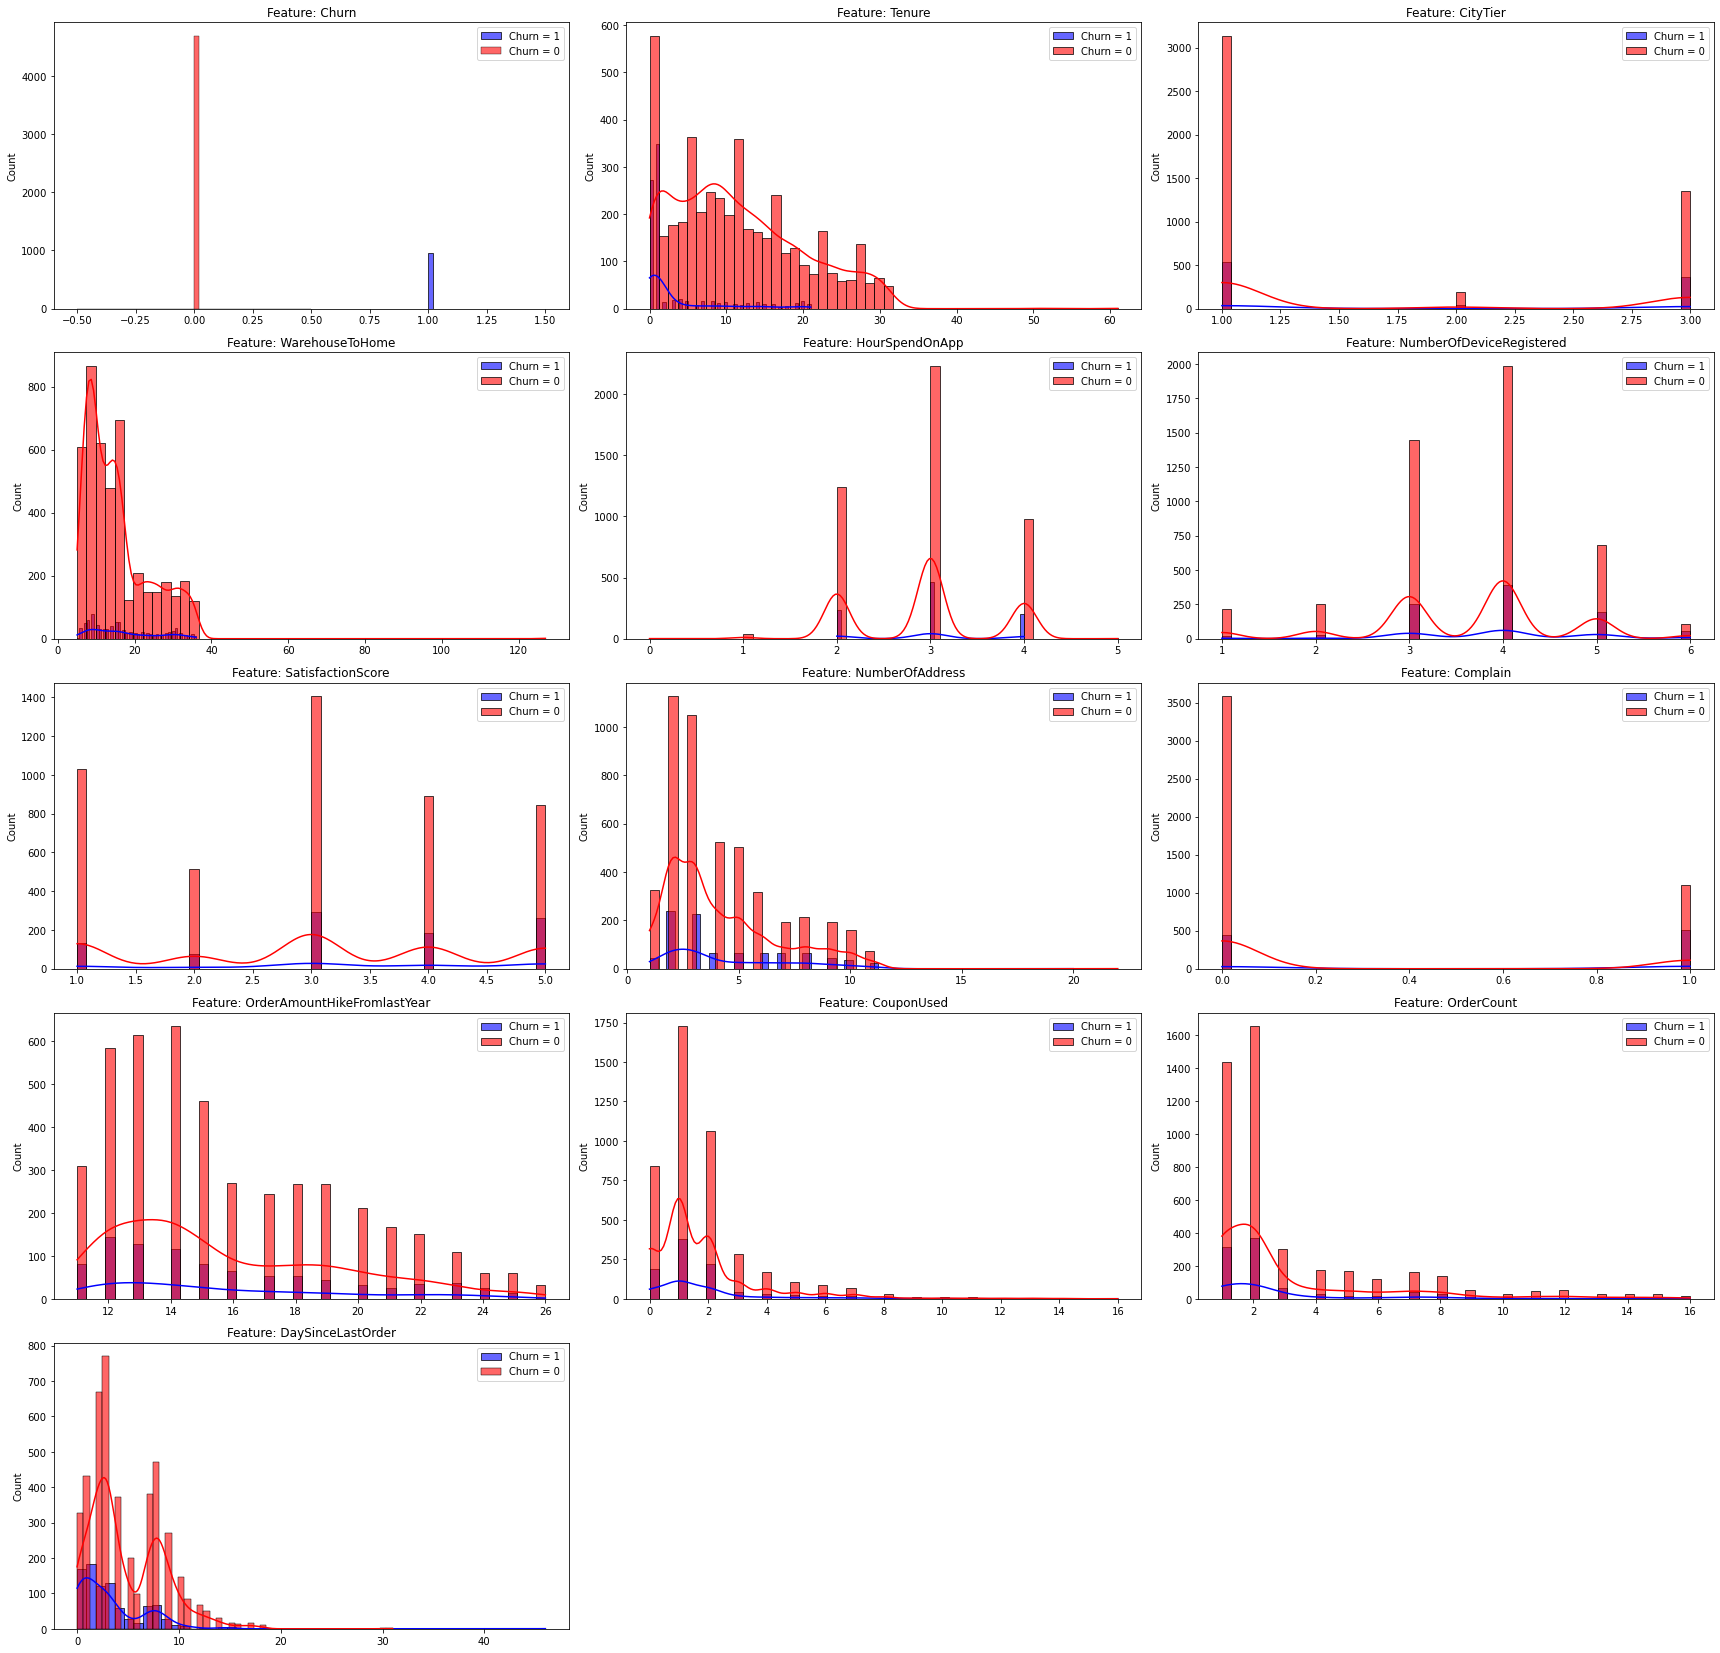

In [36]:

df1 = data.copy()
df1.drop(['PreferedOrderCat','MaritalStatus','PreferredLoginDevice','PreferredPaymentMode','Gender'],axis=1, inplace=True)
column = df1.iloc[:,1:14].columns

plt.figure(figsize=(24,32))
gs = gridspec.GridSpec(7, 3)

for i, cn in enumerate(df1[column]):
    ax = plt.subplot(gs[i])
    sns.histplot(df1[cn][df1.Churn == 1], bins=50, kde=True, label='Churn = 1', color='blue', alpha=0.6)
    sns.histplot(df1[cn][df1.Churn == 0], bins=50, kde=True, label='Churn = 0', color='red', alpha=0.6)
    ax.set_xlabel('')
    ax.set_title('Feature: ' + str(cn))
    ax.legend()

plt.tight_layout()
plt.show()


It can be assumed from the graph above that the data from the numerical feature is not normally distributed as seen from the graph and there are many outliers. Because the data is not normally distributed, the correlation test will use the Spearman correlation test method.

### Correlation Tests

#### Correlation Testing using Spearman (Numerical Feature)

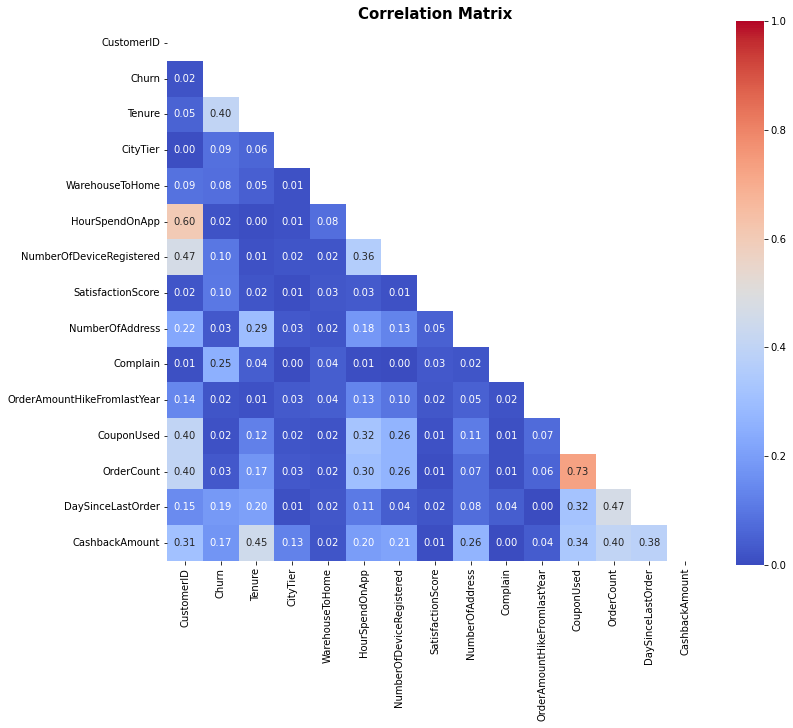

In [37]:
plt.figure(figsize=(12, 10)) 

# Compute the correlation matrix
corr = df1.corr(method='spearman').abs()

# Create a mask for the upper triangle - to avoid duplicating values
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
sns.heatmap(corr, mask=mask, annot=True, fmt='.2f', cmap='coolwarm', square=True, vmin=0, vmax=1)

plt.title('Correlation Matrix', size=15, weight='bold')
plt.show()


The results of the correlation matrix test using the "spearman" method show that no feature has a very strong correlation with the *Churn* feature. The highest correlation is owned by the *Tenure* feature, where the correlation is a negative correlation with a value of 0.4. This means that the lower the subscription period, the greater the potential for the customer to churn.

#### Correlation Testing using Cramer's (Categorical Feature)

In [38]:
from sklearn.impute import SimpleImputer, IterativeImputer

# Copy the original DataFrame
data_corr = data.copy()
data_corr.drop(['CustomerID'], axis=1, inplace=True)

# Define columns and their corresponding imputers
imputers = {
    'HourSpendOnApp': SimpleImputer(strategy='median'),
    'DaySinceLastOrder': IterativeImputer(),
    'OrderCount': IterativeImputer(),
    'Tenure': IterativeImputer(),
    'WarehouseToHome': IterativeImputer(),
    'CouponUsed': IterativeImputer(),
    'OrderAmountHikeFromlastYear': IterativeImputer()
}

# Apply imputation
for column, imputer in imputers.items():
    if column in data_corr.columns:
        data_corr[[column]] = imputer.fit_transform(data_corr[[column]])


In [39]:
import numpy as np
import scipy.stats as ss

def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x, y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1)) / (n-1))
    rcorr = r - ((r-1)**2) / (n-1)
    kcorr = k - ((k-1)**2) / (n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Calculate Cramér's V for categorical columns
categorical_columns = data_corr.describe(include='object').columns
cramers_values = [round(cramers_v(data_corr['Churn'], data_corr[col]), 4) for col in categorical_columns]

# Create a DataFrame with results
cramers_df = pd.DataFrame({
    'column': categorical_columns,
    'cramers_value': cramers_values
}).sort_values('cramers_value', ascending=False).reset_index(drop=True)

cramers_df


,column,cramers_value
0,PreferedOrderCat,0.22
1,MaritalStatus,0.18
2,PreferredPaymentMode,0.09
3,PreferredLoginDevice,0.05
4,Gender,0.03


The Cramers correlation test method is a correlation test for categorical data by looking at the size of the association between 2 variables. The closer the value is to 1, the higher the association between the variable and the churn variable. Based on the data results, the variable *PreferedOrderCat* has the highest Cramers v association value, which is 0.2245 and the lowest is *Gender* which is 0.0255.

#### Correlation Testing using Correlation Ratio (Numerical Feature)

In [40]:
import pandas as pd
import numpy as np

def correlation_ratio(cat, measure):
    # Factorize the categorical variable
    fcat, _ = pd.factorize(cat)
    
    # Create a DataFrame to facilitate calculations
    df = pd.DataFrame({'cat': fcat, 'measure': measure})
    
    # Compute means and counts for each category
    means = df.groupby('cat')['measure'].mean()
    counts = df.groupby('cat').size()
    
    # Calculate the total mean
    total_mean = np.average(means, weights=counts)
    
    # Calculate numerator and denominator for the eta squared formula
    numerator = np.sum(counts * (means - total_mean) ** 2)
    denominator = np.sum((df['measure'] - total_mean) ** 2)
    
    # Return eta squared
    return np.sqrt(numerator / denominator) if denominator != 0 else 0.0

# Compute the correlation ratio for each numerical column with respect to 'Churn'
results = []
columns = data_corr.select_dtypes(include=[np.number]).columns

for col in columns:
    eta = correlation_ratio(data_corr['Churn'], data_corr[col])
    results.append((col, round(eta, 4)))

# Create a DataFrame with the results
correlation_df = pd.DataFrame(results, columns=['column', 'correlation_ratio']).sort_values('correlation_ratio', ascending=False).reset_index(drop=True)

correlation_df


,column,correlation_ratio
0,Churn,1.00
1,Tenure,0.34
2,Complain,0.25
3,DaySinceLastOrder,0.16
4,CashbackAmount,0.15
5,NumberOfDeviceRegistered,0.11
6,SatisfactionScore,0.11
7,CityTier,0.08
8,WarehouseToHome,0.07
9,NumberOfAddress,0.04


In [41]:
correlation_df.drop([0], inplace=True)
correlation_df.reset_index(drop=True,inplace=True)
correlation_df

,column,correlation_ratio
0,Tenure,0.34
1,Complain,0.25
2,DaySinceLastOrder,0.16
3,CashbackAmount,0.15
4,NumberOfDeviceRegistered,0.11
5,SatisfactionScore,0.11
6,CityTier,0.08
7,WarehouseToHome,0.07
8,NumberOfAddress,0.04
9,OrderCount,0.03


The correlation test method with correlation ratio is a correlation test between numerical data based on the correlation measure, *Tenure* has the highest correlation ratio with *Churn*.

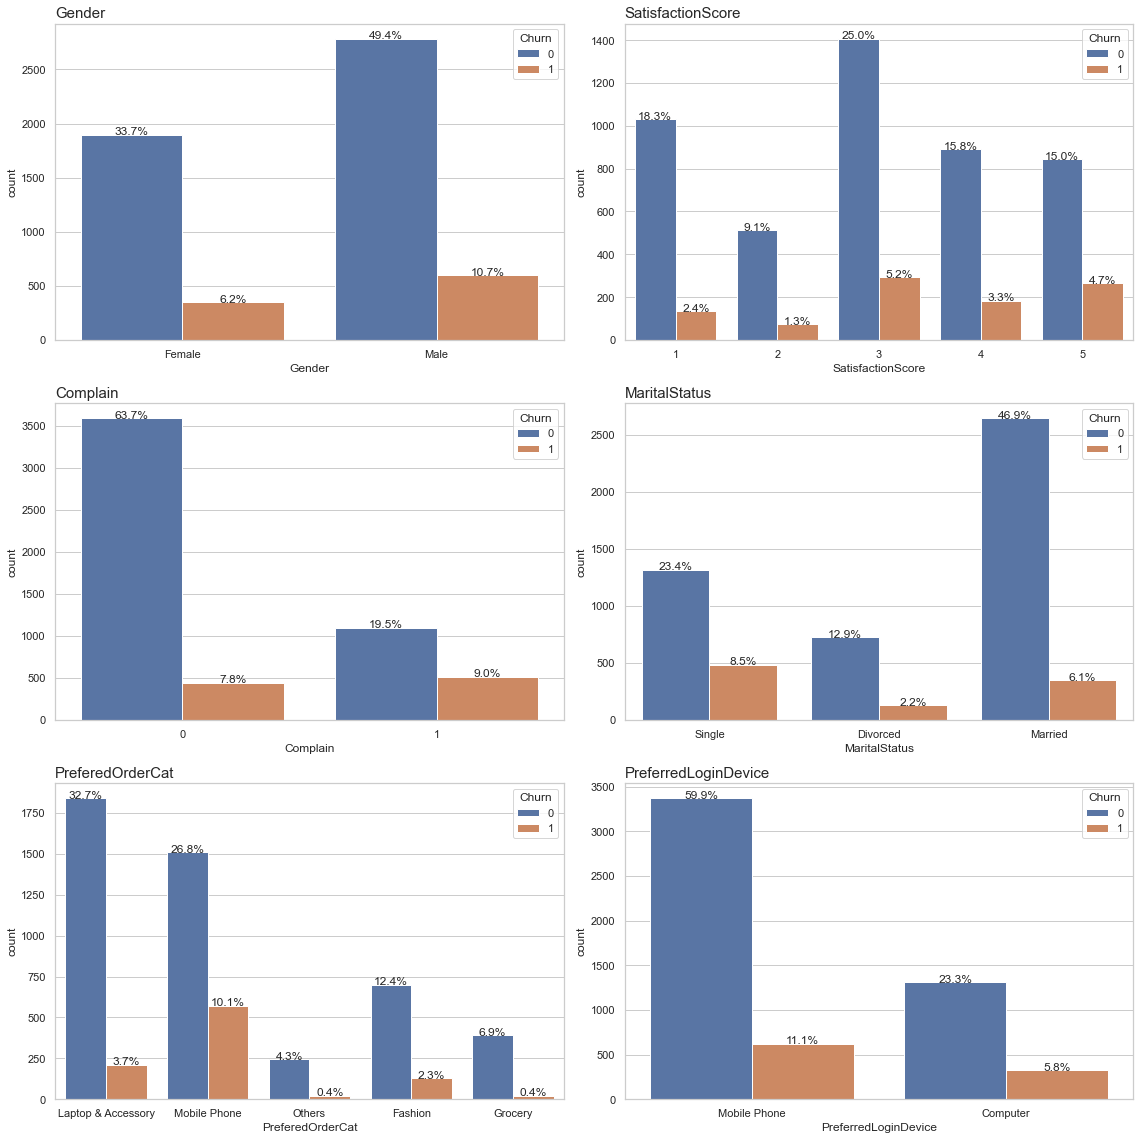

In [44]:
# List of features to plot
features = [
    'Gender',
    'SatisfactionScore',
    'Complain',
    'MaritalStatus',
    'PreferedOrderCat',
    'PreferredLoginDevice'
]

# Set up the plot style and figure size
sns.set(style="whitegrid")
plt.figure(figsize=(16, 16))

# Create subplots
for i, feature in enumerate(features, start=1):
    plt.subplot(3, 2, i)
    total = float(len(data))
    
    # Create countplot
    ax = sns.countplot(x=feature, hue="Churn", data=data)
    plt.title(feature, fontsize=15, loc='left')
    
    # Annotate each bar with percentage
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height() / total)
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()
        ax.annotate(percentage, (x, y), ha='center')

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


Based on the problem statement above, it can be concluded:
- Male customers (10.7%) churn more on e-commerce than female customers (6.2%). The assumption is because male users will churn after finding the item they are looking for.
- Customers who churn more have a Satisfaction Score of 3 (5.1%). However, there are also those who have a customer satisfaction score of 5 but still churn, at 4.7%. This shows that customer satisfaction does not affect customers to churn.
- Customers who file more complaints (9.0%) have a greater potential to churn than those who do not file complaints (7.8%). This is possible because customers who file complaints feel dissatisfied with the existing service.
- Customers who are still single tend to churn by 8.2%. The assumption is that because they are still single, so they don't buy many necessities.
- Customers who churn more choose to buy *mobile phones* by 9.6%. The assumption is because of the need to buy mobile phones every year. Even so, mobile phone purchases tend to be one-time or one-time purchases so there is no need for a second and third purchase at relatively the same time.
- Customers who churn by 11% tend to log in using a mobile phone rather than a computer. This can be made into a strategy to retain customers by providing discount coupons if they log in using a mobile phone.
- It can be concluded that customers who tend to churn are male, satisfaction score 3, more complaints, more purchases of mobile phones and login using mobile phones.

#### Information on Churn Customers

The following graph will describe the characteristics of customer churn based on features.

In [45]:
df= data.groupby(['Churn','Tenure'])['CustomerID'].count().reset_index()

If we look at the graph above, it is found that new customers whose subscription period is less than 2 months are more likely to churn or move to other companies' online platforms, which can be caused by several things, namely:
1. At the beginning of subscribing, customers are in the stage of comparing several online platforms to find which online platform provides convenience for these customers.
2. The discount promo factor for new customers, which is usually greater than after subscribing, can be a factor in why customers churn after 1 month. Or conversely, at the beginning of subscribing, customers feel uninterested because there are no discount promos or cashback.
3. Customers have a bad experience when shopping at the beginning of subscribing, such as customer service that is late to respond, late delivery of goods, to applications that are buggy or error. In the early phase of subscribing, we know that customers will be more psychologically sensitive because they are still in the stage of finding which application can answer customer needs. In contrast to customers who have been subscribing for a long time, where the majority have already felt comfortable so that they don't want to bother moving to another platform starting from re-registering.
4. Customers who only buy once because they find the item they are looking for, then after the transaction is complete, they immediately stop subscribing.

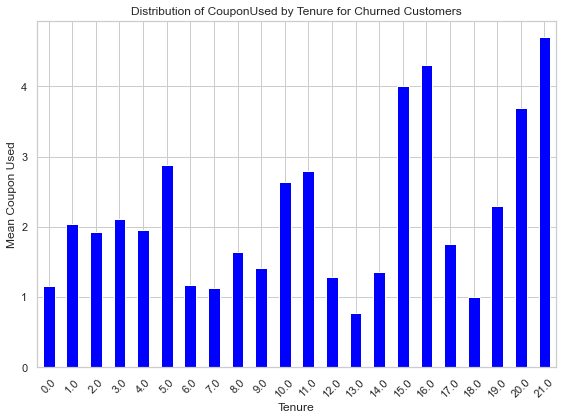

In [54]:
# Compute the mean of 'CouponUsed' for each 'Tenure'
mean_coupon_used = data_churn.groupby('Tenure')['CouponUsed'].mean()

# Plot the bar chart
plt.figure(figsize=(8, 6))
mean_coupon_used.plot(kind='bar', color='blue')
plt.title('Distribution of CouponUsed by Tenure for Churned Customers')
plt.xlabel('Tenure')
plt.ylabel('Mean Coupon Used')
plt.xticks(rotation=45)  
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

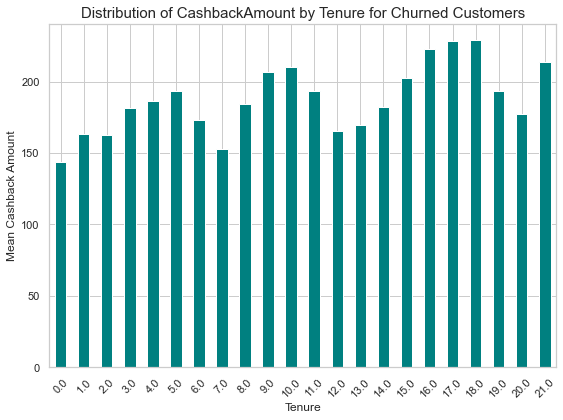

In [58]:
# Compute the mean of 'CashbackAmount' for each 'Tenure'
mean_cashback_amount = data_churn.groupby('Tenure')['CashbackAmount'].mean()

# Plot the bar chart
plt.figure(figsize=(8, 6))
mean_cashback_amount.plot(kind='bar', color='teal')
plt.title('Distribution of CashbackAmount by Tenure for Churned Customers', fontsize=15)
plt.xlabel('Tenure', fontsize=12)
plt.ylabel('Mean Cashback Amount', fontsize=12)
plt.xticks(rotation=45)  
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

Through the graph above, we test whether the effect of discount promos in the form of cashback has a significant effect on customer churn for customers who have a subscription period of less than 2 months. It was found that for customers less than 2 months who churn have an average amount of cashback and low coupon usage compared to churned customers who have subscribed for more than 2 months. The graph shows the average increase in coupon promos and cashback for customers who have subscribed longer. This can be one of the factors causing why in a period of less than 2 months many customers churn because the coupon promos and cashback obtained are quite small.

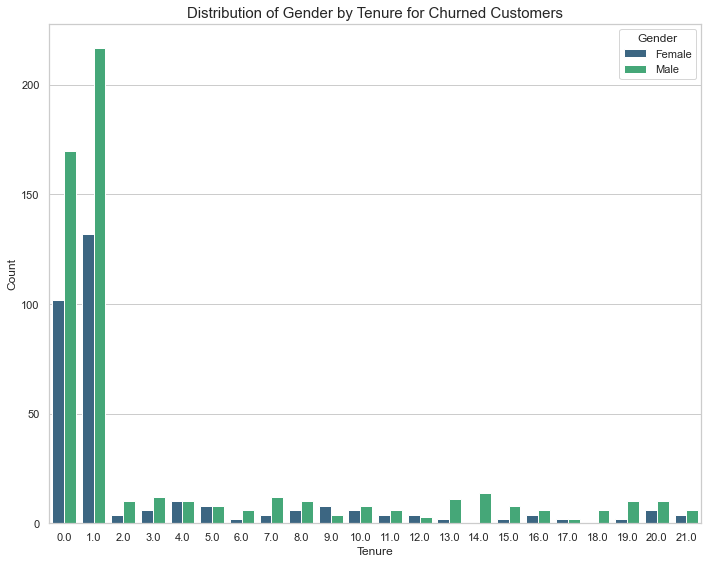

In [61]:
# Set the size of the figure
plt.figure(figsize=(10, 8))

# Create a countplot with custom palette
sns.countplot(x='Tenure', hue='Gender', palette='viridis', data=data_churn)

# Add title and adjust layout
plt.title("Distribution of Gender by Tenure for Churned Customers", fontsize=15)
plt.xlabel('Tenure', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()  # Adjust layout to fit labels

# Display the plot
plt.show()

From the graph above, it is found that men churn more than women in the subscription period of less than 2 months. This shows that men are less loyal than women in that period. In addition, men are mostly happy to try many applications compared to women who, if they are comfortable with one application, will be loyal to that application.

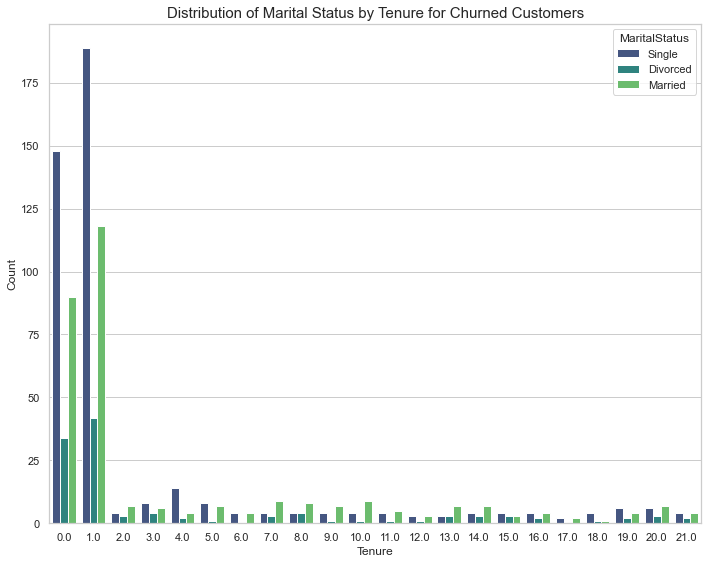

In [64]:
# Create a countplot
plt.figure(figsize=(10, 8))
sns.countplot(x='Tenure', hue='MaritalStatus', palette='viridis', data=data_churn)
plt.title("Distribution of Marital Status by Tenure for Churned Customers", fontsize=15)
plt.xlabel('Tenure', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.tight_layout()  # Adjust layout to fit labels

# Display the plot
plt.show()

From the graph above, it is found that someone with a single MaritalStatus churns more than other MaritalStatus in a subscription period of less than 2 months. This can show that the psychology of someone who is still single likes to move around or is not loyal depending on which application provides many benefits even if they have to move from platform to platform.

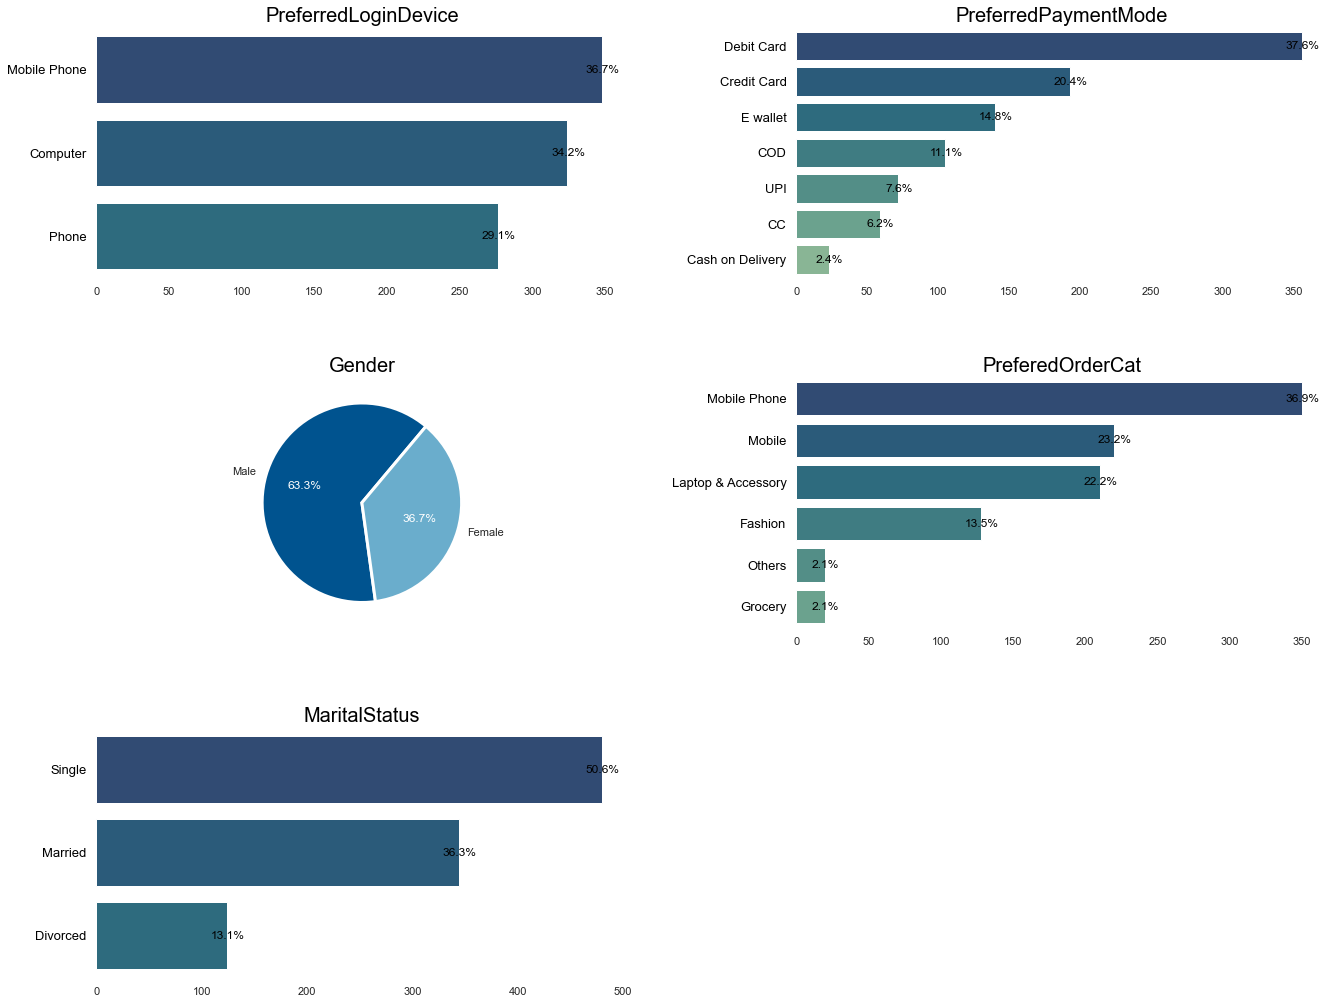

In [65]:
# Define common plot design settings
def plot_design(title):
    plt.xlabel('')
    plt.ylabel('')
    plt.yticks(fontsize=13, color='black')
    plt.box(False)
    plt.title(title, fontsize=20, color='black')
    plt.tight_layout(pad=5.0)
    plt.grid(False)

# Select categorical columns
categ = data_churn.select_dtypes(include=object).columns

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(20, 20))
fig.patch.set_facecolor('white')
mpl.rcParams['font.size'] = 12

# Define color palette
colors = sns.color_palette("crest_r", n_colors=7).as_hex()

# Loop through categorical columns
for idx, cat in enumerate(categ):
    plt.subplot(4, 2, idx + 1)
    
    if data_churn[cat].nunique() > 2:
        # Countplot for columns with more than 2 unique values
        sns.countplot(y=cat, data=data_churn, order=data_churn[cat].value_counts().index, palette=colors)
        pct = data_churn[cat].value_counts(normalize=True) * 100
        # Add percentage labels
        for p, percent in zip(plt.gca().patches, pct):
            width = p.get_width()
            plt.text(width + 0.5, p.get_y() + p.get_height() / 2, f'{percent:.1f}%', ha='center', va='center', color='black', fontsize=12)
        plot_design(cat)
    else:
        # Pie chart for columns with 2 unique values
        _, texts, pcts = plt.pie(
            data_churn[cat].value_counts(), 
            labels=data_churn[cat].value_counts().index, 
            colors=['#00538F', '#6AADCC'],
            autopct='%1.1f%%', 
            wedgeprops={'linewidth': 3.0, 'edgecolor': 'white'},
            startangle=50
        )
        for pct in pcts:
            pct.set_color('white')
        plt.title(cat, fontsize=20, color='black')

plt.show()


Here are the characteristics of churn customers based on category data:
- **PreferrredLoginDevice**, 36% of customers tend to churn for those who use Mobile Phones. This could be due to the practicality of the mobile phone itself so that many people use it. In addition, mobile phones can accommodate several applications so that it is easy for customers to move to other company applications that provide the same service. This is also in accordance with a survey from https://www.statista.com/statistics/384224/monthly-app-launches-churn/ in 2018 that mobile app users on average after 3 months of use have a high churn rate of 71 percent.
- **Gender**, 63% of male customers churn more because men tend to stop using the application after finding the item they are looking for.
- **MaritalStatus**, 50% of single customers churn more than those who are in a relationship or divorced. This could be due to the flexibility for single customers to explore and compare services from each company with the same service.
-**PreferredPaymentMode**, 37% of customers who use debit cards churn more because of the practicality of the debit card itself so that many customers use this payment. -**PreferredOrderCat**, the category of goods that churn the most is mobile phones because 36% of customers transact for this category. Price competition in this category is very tight so that if there are goods that are slightly cheaper in other commerce, customers will switch to that service.

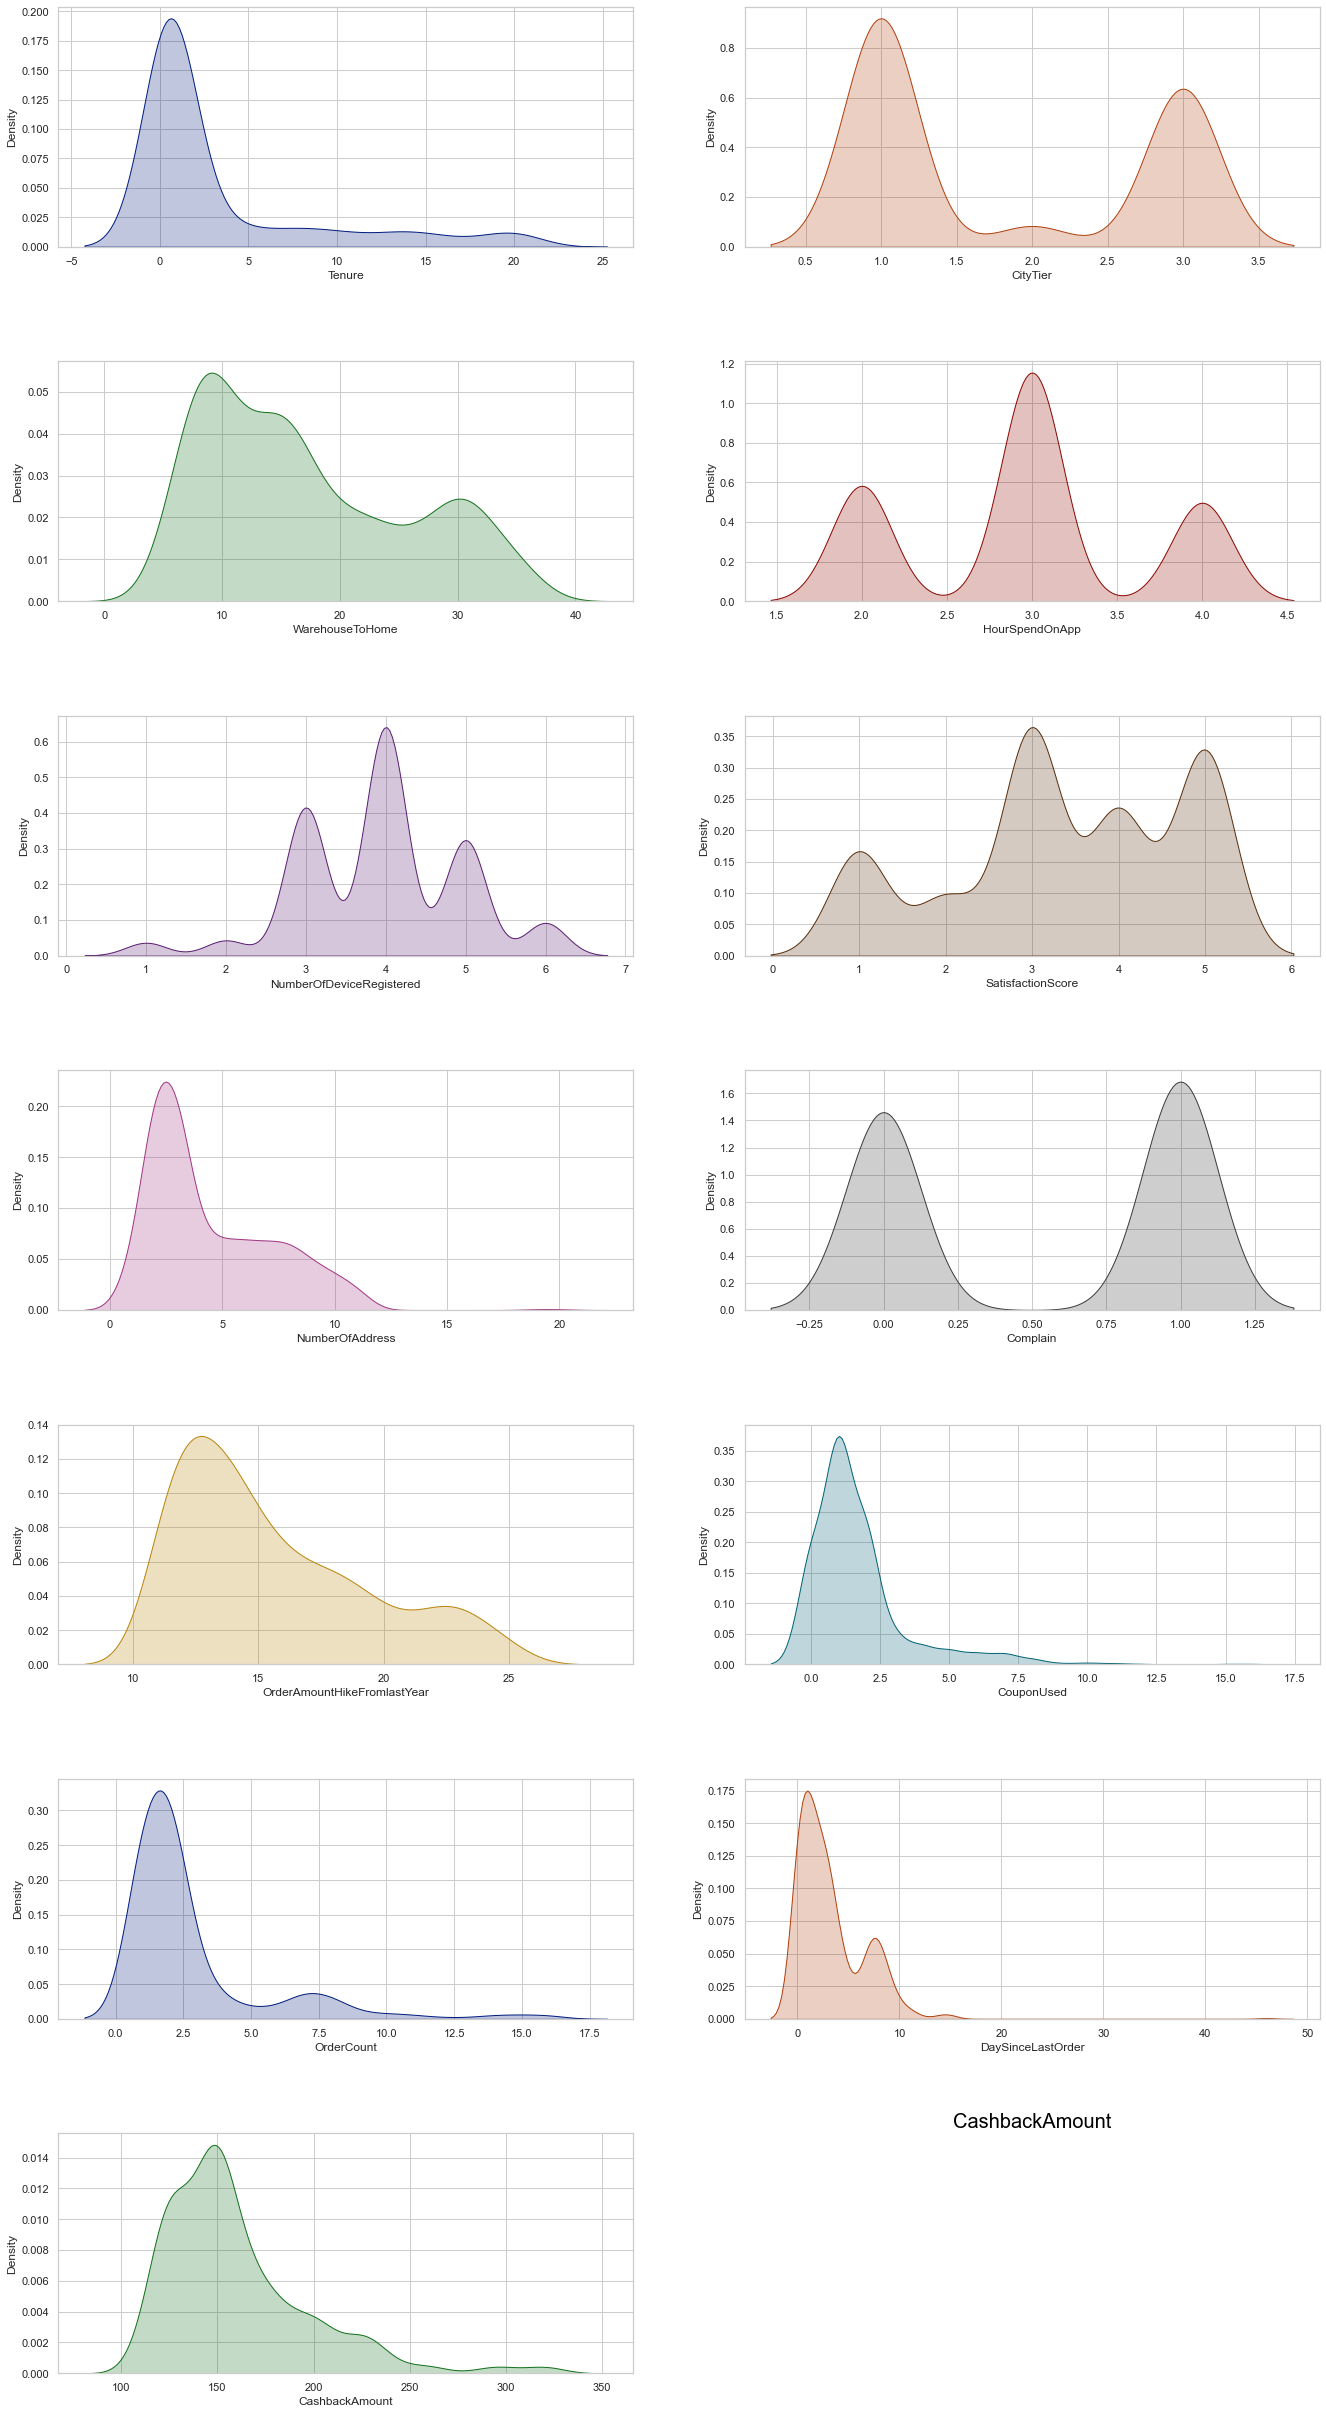

In [67]:
# KDE plots for numeric columns
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

# Define common plot design settings
def plot_design(title):
    plt.xlabel('')
    plt.ylabel('')
    plt.title(title, fontsize=20, color='black')
    plt.grid(False)
    plt.tight_layout(pad=5.0)

# Select numeric columns
numeric = data_churn.select_dtypes(exclude=object).columns

# Set up the figure and axes
fig, ax = plt.subplots(nrows=7, ncols=2, figsize=(20, 35))
fig.patch.set_facecolor('white')
mpl.rcParams['font.size'] = 12

# Define color palette
colors = sns.color_palette("dark", n_colors=len(numeric)).as_hex()

# Flatten the axes array for easy iteration
axes = ax.flatten()

# Plot KDE for each numeric column
for idx, col in enumerate(numeric):
    sns.kdeplot(x=col, data=data_churn, color=colors[idx], fill=True, ax=axes[idx])
    plot_design(col)

# Hide any unused subplots
for i in range(len(numeric), len(axes)):
    axes[i].axis('off')

plt.show()


Here are the characteristics of churn customers based on numerical data:
- tenure, 72% of churn customers are at 0-1 because usually customers in this area only try the application, chase discounts, customers only make transactions once, or customers are not comfortable using the application so they switch to other applications.
- CityTier, customers from city Tier 1 churn more because 56% of customer transactions are made in city tier 1 which can be said to be reasonable because City Tier 1 has a higher economic turnover rate than tiers 2 and 3.
- WarehouseToHome, a distance of 8-9 from the warehouse churns more because 16% of customers are in that location so the location of the warehouse can be said to be strategic because it is not too far from the customer's home.
- HourSpendOnApp, 52% of customers use the application for 3 hours more Churn can be assumed that customers are looking for goods during that time but are not suitable or the goods are not found so they switch to other commerce applications.
- NumberOfDeviceRegistered, 41% of customers who use 4 different devices churn more. This can be a concern for the company because customers who connect to 4 different devices are usually customers who are comfortable using the service so it is necessary to analyze the cause of their churn.
- SatisfactionScore, 30% of customers who gave a rating of 3 and 28% of customers who gave a rating of 5 churn more. The company also needs to pay attention because many customers who give a rating of 3 or 5 which means they are satisfied but the customer churns.
- NumberOfAddress, 25% of customers who have 2 different addresses churn more. This can be a further concern because customers who provide addresses to 2 different locations are usually customers who are comfortable using the service.
- Complain, 53% of customers who complain churn more so it is certain that their complaints are not resolved properly so that customers are not satisfied with the service provided this can be a concern for the company to improve their afterservice performance.
- OrderAmountHikeFromLastYear, 15% of customers who have increased orders by 12% since last year churn more this can be a concern for the company that even though orders have increased but customers still Churn.
- CoupunUsed, 40% of customers who use coupons 1 time are more likely to churn because these customers may only be chasing discounts and then after the discount is gone they don't use the service anymore.
- OrderCount, 40% of customers who have ordered 2 times since last month are more likely to churn because they find the item they are looking for and then don't use the service anymore, just to use the discount, customers are not satisfied with the service so they immediately switch to another service.
- DaySinceLastOrder, 20% of customers 1 day after the last order are more likely to churn because customers don't like the service, just to use coupons or discounts from the service, find the item they are looking for and then are not interested in using the service anymore.
- CashbackAmount, 0.21% of customers churn a lot on average cashback of 149 dollars because this cashback value is commonly given by the service.

Here is an in-depth analysis of *NumberOfDeviceRegistered, SatisfactionScore, NumberOfAddress, OrderAmountHikeFromLastYear* when compared to the *Complain* variable.

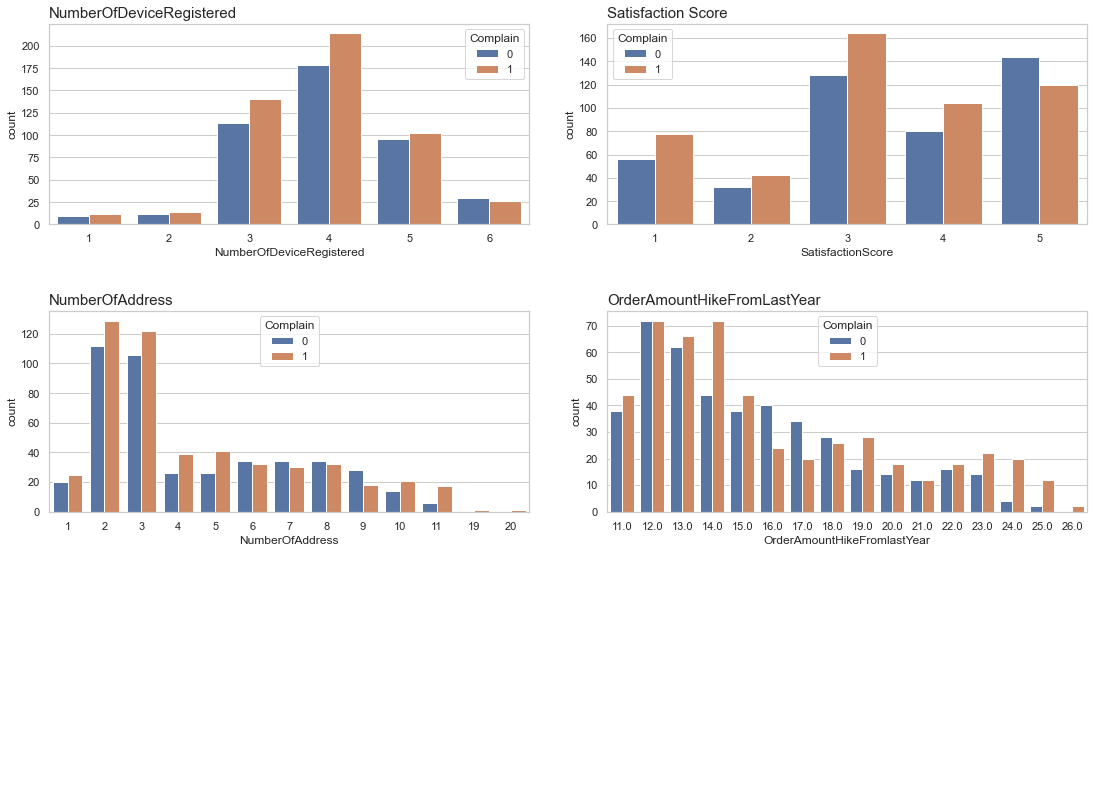

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the style for seaborn plots
sns.set(style="whitegrid")

# Create a figure with a specified size
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16,12))
fig.tight_layout(pad=5.0)  # Adjust layout to prevent overlap

# List of plots to create
plots = [
    ("NumberOfDeviceRegistered", 'NumberOfDeviceRegistered'),
    ("SatisfactionScore", 'Satisfaction Score'),
    ("NumberOfAddress", 'NumberOfAddress'),
    ("OrderAmountHikeFromlastYear", 'OrderAmountHikeFromLastYear')
]

# Flatten axes for easy iteration
axes = axes.flatten()

# Loop through plots and create each subplot
for ax, (x_var, title) in zip(axes, plots):
    sns.countplot(x=x_var, hue="Complain", data=data_churn, ax=ax)
    ax.set_title(title, fontsize=15, loc='left')

# Remove unused subplots if there are more axes than plots
for i in range(len(plots), len(axes)):
    axes[i].axis('off')

plt.tight_layout(pad=3.0)
# Show the plot
plt.show()


Although customers use more than 1 *device* to register for the service, in terms of *complaints* they are high in the range of 3 to 5 devices. Customers also give a score of 3 and 5 for satisfaction, but it can be seen that the customer complaint score is also high. Similar to *NumberOfAddress* and *OrderAmountHikeFromLastYear*, customers who are comfortable registering more than 1 address and also customers who increase orders by 12% from last year also have high complaint scores.

It can be assumed that even though customers are comfortable and actively transacting using the service, because their *complaints* or problems are not handled properly, these customers *churn*. To overcome this, the company can make improvements on the *customer service* side by creating clear *guidelines, FAQs* and creating a *chat* feature directly so that the company can be responsive in responding to customer complaints.